# Chart Patterns

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [24]:
ticker="MSFT"
start_date="2021-01-01"
end_date="2025-05-13"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [25]:
display(data.head())
display(data.tail())

,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,210.002014,215.124483,207.223720,214.671080,37130100
2021-01-05,210.204590,210.802704,208.082288,209.587193,23823000
2021-01-06,204.754105,208.844369,204.455055,204.676928,35930700
2021-01-07,210.580826,211.593747,206.162587,206.480920,27694500
2021-01-08,211.863861,212.789964,209.365333,210.957056,22956200


,Close,High,Low,Open,Volume
Date,,,,,
2025-05-06,433.309998,437.730011,431.170013,432.200012,15104200
2025-05-07,433.350006,438.119995,431.109985,433.839996,23295300
2025-05-08,438.170013,443.670013,435.660004,437.929993,23491300
2025-05-09,438.730011,440.739990,435.880005,440.000000,15324200
2025-05-12,449.260010,449.369995,439.779999,445.940002,22801700


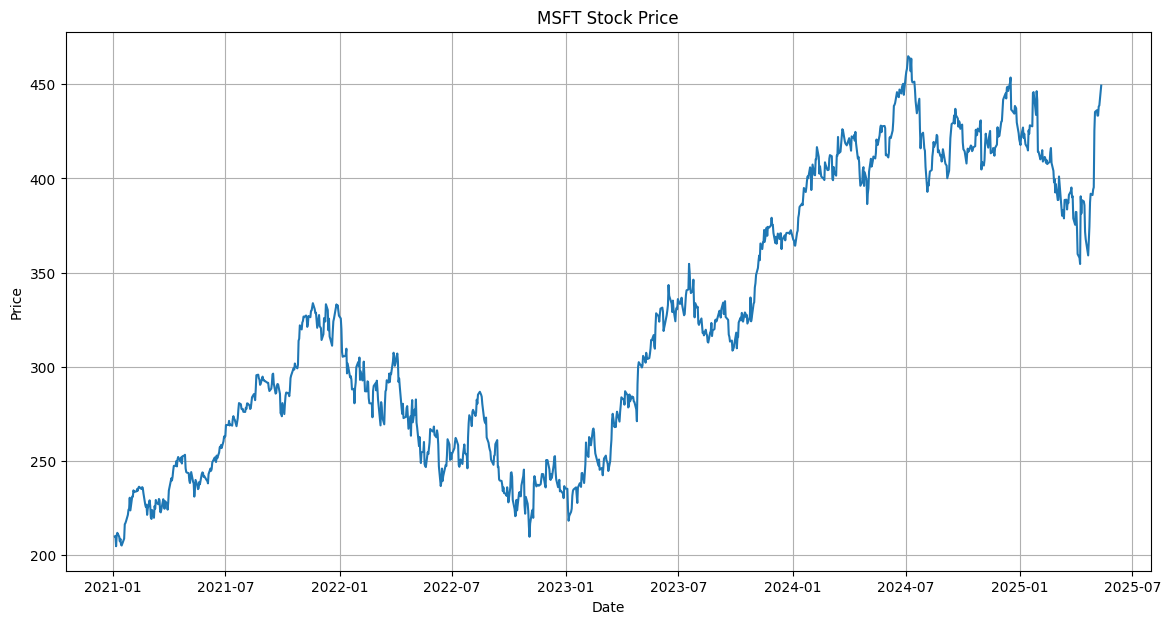

In [26]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Head and Shoulders (ศีรษะและไหล่):

- ลักษณะ: Head and Shoulders เป็นรูปแบบกราฟที่บ่งบอกถึงการกลับตัวของแนวโน้มจากขาขึ้นเป็นขาลง โดยมีลักษณะคล้ายกับศีรษะและไหล่ของคน
- ส่วนประกอบ:
    - Left Shoulder (ไหล่ซ้าย): จุดสูงสุดแรกของราคา
    - Head (ศีรษะ): จุดสูงสุดที่สูงกว่าไหล่ซ้าย
    - Right Shoulder (ไหล่ขวา): จุดสูงสุดที่ต่ำกว่าศีรษะ แต่ใกล้เคียงกับไหล่ซ้าย
    - Neckline (เส้นคอ): เส้นที่ลากเชื่อมจุดต่ำสุดระหว่างไหล่ซ้ายและศีรษะ และจุดต่ำสุดระหว่างศีรษะและไหล่ขวา
- รูปแบบ:
    1. แนวโน้มขาขึ้น: ก่อนเกิด Head and Shoulders จะต้องมีแนวโน้มขาขึ้นมาก่อน
    2. ไหล่ซ้าย: ราคาขึ้นไปทำจุดสูงสุดแรก (Left Shoulder) แล้วปรับตัวลง
    3. ศีรษะ: ราคาขึ้นไปทำจุดสูงสุดใหม่ที่สูงกว่าไหล่ซ้าย (Head) แล้วปรับตัวลง
    4. ไหล่ขวา: ราคาขึ้นไปทำจุดสูงสุดที่ต่ำกว่าศีรษะ (Right Shoulder) แล้วปรับตัวลง
    5. ทะลุเส้นคอ: ราคาปรับตัวลงต่ำกว่าเส้นคอ (Neckline)
- การตีความ:
    - สัญญาณขาย: เมื่อราคาปรับตัวลงต่ำกว่าเส้นคอ ถือเป็นสัญญาณขาย ซึ่งบ่งบอกว่าแนวโน้มขาขึ้นได้สิ้นสุดลงแล้ว และกำลังจะเปลี่ยนเป็นแนวโน้มขาลง
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดระยะห่างระหว่างศีรษะและเส้นคอ จากนั้นลากเส้นลงมาจากจุดที่ราคา Breakout (ทะลุ) เส้นคอ

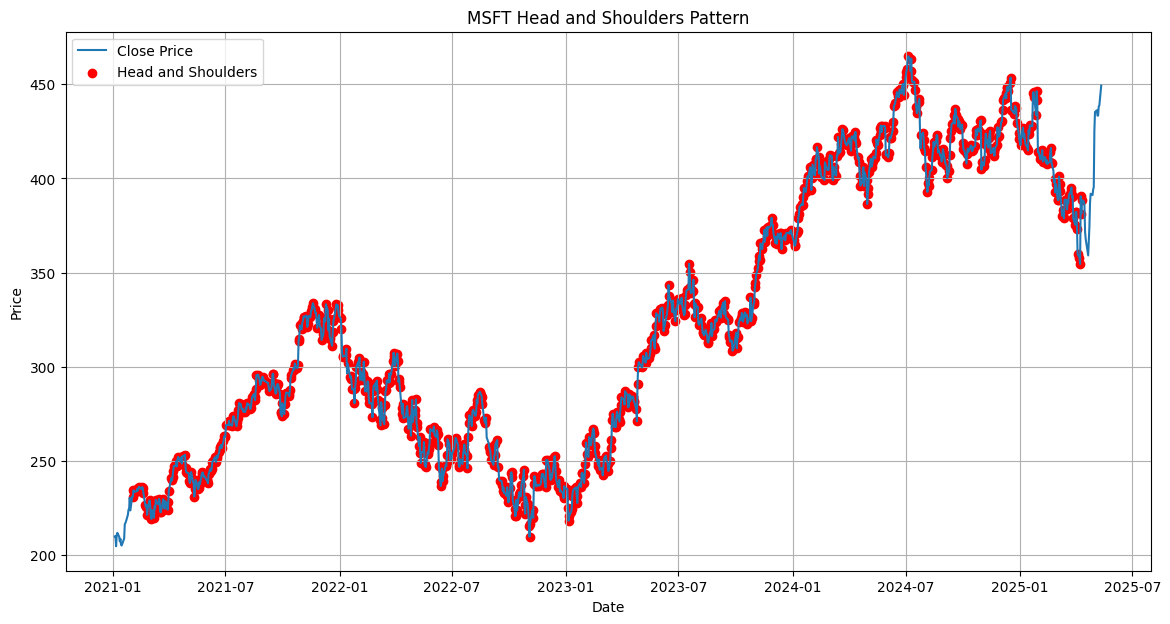

In [27]:
#No warning
import warnings
warnings.filterwarnings("ignore")

#Head and Shoulders
def head_and_shoulders(data, window=20):
    data['H&S'] = np.nan
    for i in range(window, len(data) - window):
        left_shoulder = data['Close'][i - window:i].max()
        head = data['Close'][i - window:i].min()
        right_shoulder = data['Close'][i:i + window].max()
        if left_shoulder > head < right_shoulder:
            data['H&S'].iloc[i] = 1
    return data

# Apply the head and shoulders pattern detection
data = head_and_shoulders(data)
# Plot the head and shoulders pattern   
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')    
plt.scatter(data.index[data['H&S'] == 1], data['Close'][data['H&S'] == 1], color='red', label='Head and Shoulders')
plt.title(f'{ticker} Head and Shoulders Pattern')
plt.xlabel('Date')      
plt.ylabel('Price')
plt.legend()    
plt.grid()
plt.show()  

## Double Top (ดับเบิลท็อป หรือ ยอดคู่):

- ลักษณะ: Double Top เป็นรูปแบบกราฟที่บ่งบอกถึงการกลับตัวของแนวโน้มจากขาขึ้นเป็นขาลง โดยมีลักษณะเป็นยอดเขาสองยอดที่ระดับราคาใกล้เคียงกัน
- ส่วนประกอบ:
    - ยอดที่ 1 (Top 1): จุดสูงสุดแรกของราคา
    - ยอดที่ 2 (Top 2): จุดสูงสุดที่สองของราคา ซึ่งมีระดับราคาใกล้เคียงกับยอดที่ 1
    - Valley (หุบเขา): จุดต่ำสุดระหว่างยอดที่ 1 และยอดที่ 2
    - Support Level (แนวรับ): ระดับราคาของ Valley ซึ่งเป็นแนวรับที่สำคัญ
- รูปแบบ:
    1. แนวโน้มขาขึ้น: ก่อนเกิด Double Top จะต้องมีแนวโน้มขาขึ้นมาก่อน
    2. ยอดที่ 1: ราคาขึ้นไปทำจุดสูงสุดแรก (Top 1) แล้วปรับตัวลง
    3. Valley: ราคาปรับตัวลงมาถึงระดับหนึ่ง (Valley) แล้วเด้งขึ้น
    4. ยอดที่ 2: ราคาขึ้นไปทำจุดสูงสุดที่สอง (Top 2) ซึ่งมีระดับราคาใกล้เคียงกับยอดที่ 1 แต่ไม่สามารถขึ้นไปสูงกว่าได้
    5. ทะลุแนวรับ: ราคาปรับตัวลงต่ำกว่าระดับ Valley (ทะลุแนวรับ)
- การตีความ:
    - สัญญาณขาย: เมื่อราคาปรับตัวลงต่ำกว่าระดับ Valley (ทะลุแนวรับ) ถือเป็นสัญญาณขาย ซึ่งบ่งบอกว่าแนวโน้มขาขึ้นได้สิ้นสุดลงแล้ว และกำลังจะเปลี่ยนเป็นแนวโน้มขาลง
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดระยะห่างระหว่างยอดเขา (Top) และ Valley จากนั้นลากเส้นลงมาจากจุดที่ราคา Breakout (ทะลุ) แนวรับ
- สิ่งที่ Double Top บอกเรา:
    - แรงซื้ออ่อนแอ: การที่ราคาไม่สามารถขึ้นไปทำจุดสูงสุดใหม่ได้ บ่งบอกว่าแรงซื้อเริ่มอ่อนแอลง
    - แรงขายแข็งแกร่ง: การที่ราคาปรับตัวลงต่ำกว่าระดับ Valley แสดงว่าแรงขายเริ่มแข็งแกร่งขึ้น
    - การเปลี่ยนแนวโน้ม: Double Top เป็นสัญญาณเตือนว่าแนวโน้มขาขึ้นอาจกำลังจะเปลี่ยนเป็นแนวโน้มขาลง

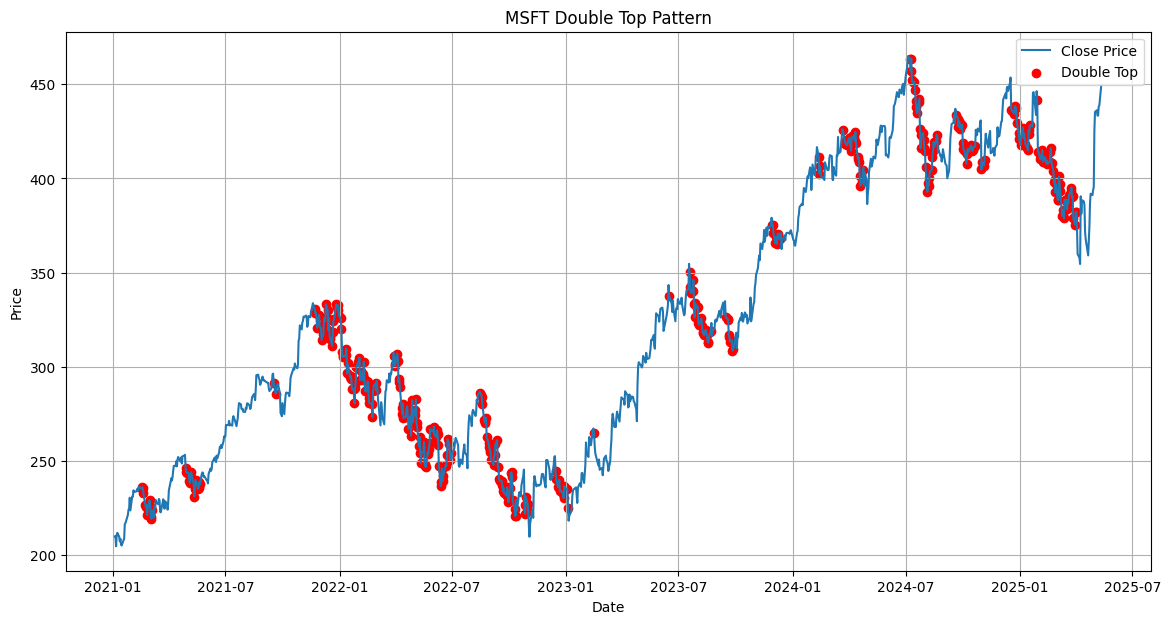

In [28]:
#Double Top
def double_top(data, window=20):
    data['Double Top'] = np.nan
    for i in range(window, len(data) - window):
        left_peak = data['Close'][i - window:i].max()
        right_peak = data['Close'][i:i + window].max()
        if left_peak > right_peak:
            data['Double Top'].iloc[i] = 1
    return data

# Apply the double top pattern detection
data = double_top(data)
# Plot the double top pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Double Top'] == 1], data['Close'][data['Double Top'] == 1], color='red', label='Double Top')
plt.title(f'{ticker} Double Top Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Double Bottom (ดับเบิลบอตทอม หรือ ก้นคู่):

- ลักษณะ: Double Bottom เป็นรูปแบบกราฟที่บ่งบอกถึงการกลับตัวของแนวโน้มจากขาลงเป็นขาขึ้น โดยมีลักษณะเป็นก้นสองก้นที่ระดับราคาใกล้เคียงกัน
- ส่วนประกอบ:
    - ก้นที่ 1 (Bottom 1): จุดต่ำสุดแรกของราคา
    - ก้นที่ 2 (Bottom 2): จุดต่ำสุดที่สองของราคา ซึ่งมีระดับราคาใกล้เคียงกับก้นที่ 1
    - Peak (ยอดเขา): จุดสูงสุดระหว่างก้นที่ 1 และก้นที่ 2
    - Resistance Level (แนวต้าน): ระดับราคาของ Peak ซึ่งเป็นแนวต้านที่สำคัญ
- รูปแบบ:
    1. แนวโน้มขาลง: ก่อนเกิด Double Bottom จะต้องมีแนวโน้มขาลงมาก่อน
    2. ก้นที่ 1: ราคาลงไปทำจุดต่ำสุดแรก (Bottom 1) แล้วปรับตัวขึ้น
    3. Peak: ราคาปรับตัวขึ้นมาถึงระดับหนึ่ง (Peak) แล้วปรับตัวลง
    4. ก้นที่ 2: ราคาลงไปทำจุดต่ำสุดที่สอง (Bottom 2) ซึ่งมีระดับราคาใกล้เคียงกับก้นที่ 1 แต่ไม่สามารถลงไปต่ำกว่าได้
    5. ทะลุแนวต้าน: ราคาปรับตัวขึ้นสูงกว่าระดับ Peak (ทะลุแนวต้าน)
- การตีความ:
    - สัญญาณซื้อ: เมื่อราคาปรับตัวขึ้นสูงกว่าระดับ Peak (ทะลุแนวต้าน) ถือเป็นสัญญาณซื้อ ซึ่งบ่งบอกว่าแนวโน้มขาลงได้สิ้นสุดลงแล้ว และกำลังจะเปลี่ยนเป็นแนวโน้มขาขึ้น
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดระยะห่างระหว่างก้น (Bottom) และ Peak จากนั้นลากเส้นขึ้นมาจากจุดที่ราคา Breakout (ทะลุ) แนวต้าน
- สิ่งที่ Double Bottom บอกเรา:

    - แรงขายอ่อนแอ: การที่ราคาไม่สามารถลงไปทำจุดต่ำสุดใหม่ได้ บ่งบอกว่าแรงขายเริ่มอ่อนแอลง
    - แรงซื้อแข็งแกร่ง: การที่ราคาปรับตัวขึ้นสูงกว่าระดับ Peak แสดงว่าแรงซื้อเริ่มแข็งแกร่งขึ้น
    - การเปลี่ยนแนวโน้ม: Double Bottom เป็นสัญญาณเตือนว่าแนวโน้มขาลงอาจกำลังจะเปลี่ยนเป็นแนวโน้มขาขึ้น

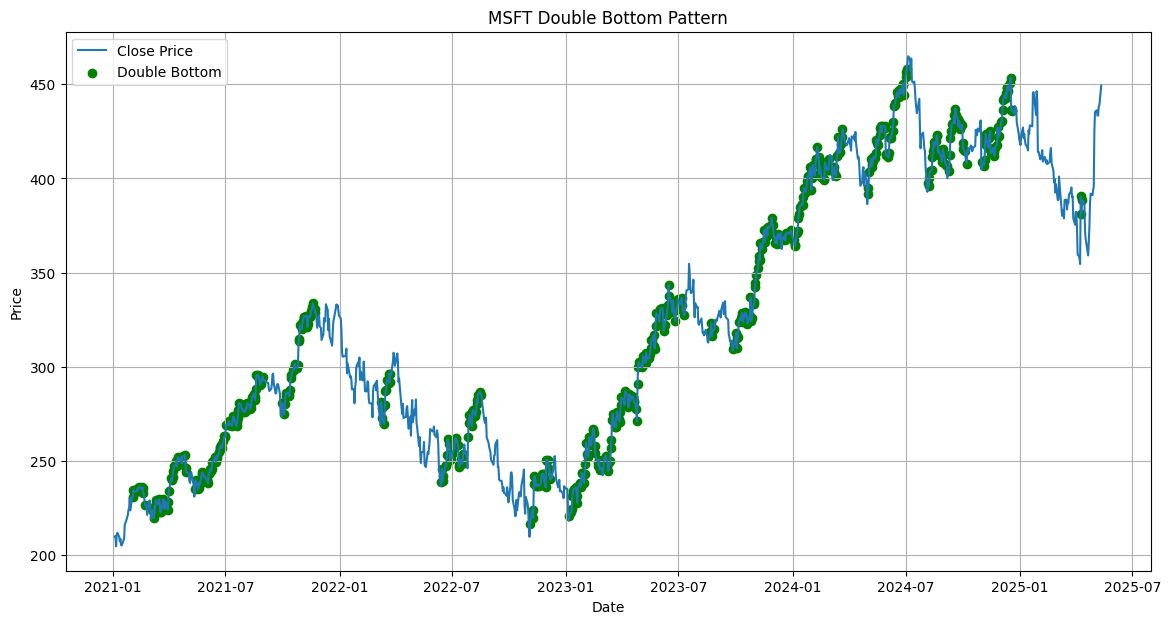

In [29]:
#Double Bottom
def double_bottom(data, window=20):
    data['Double Bottom'] = np.nan
    for i in range(window, len(data) - window):
        left_valley = data['Close'][i - window:i].min()
        right_valley = data['Close'][i:i + window].min()
        if left_valley < right_valley:
            data['Double Bottom'].iloc[i] = 1
    return data
# Apply the double bottom pattern detection
data = double_bottom(data)
# Plot the double bottom pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Double Bottom'] == 1], data['Close'][data['Double Bottom'] == 1], color='green', label='Double Bottom')
plt.title(f'{ticker} Double Bottom Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Triangles (สามเหลี่ยม):

- ลักษณะ: Triangles เป็นรูปแบบกราฟที่บ่งบอกถึงช่วงเวลาของการรวมตัว (Consolidation) ของราคา ก่อนที่จะเกิดการ Breakout (ทะลุ) ไปในทิศทางใดทิศทางหนึ่ง โดยมีลักษณะเป็นรูปสามเหลี่ยมที่เกิดจากเส้นแนวโน้ม (Trendlines) สองเส้นที่มาบรรจบกัน
- ประเภทของ Triangles:
    1. Ascending Triangle (สามเหลี่ยมขึ้น):
        - ลักษณะ: มีเส้นแนวต้าน (Resistance Line) ที่เป็นเส้นตรงแนวนอน และมีเส้นแนวโน้มขึ้น (Uptrend Line) ที่ลากเชื่อมจุดต่ำสุดที่ยกสูงขึ้นเรื่อย ๆ
        - การตีความ: บ่งบอกถึงแนวโน้มขาขึ้นที่แข็งแกร่ง มีโอกาสที่ราคาจะ Breakout ขึ้นไปด้านบน
    2. Descending Triangle (สามเหลี่ยมลง):
        - ลักษณะ: มีเส้นแนวรับ (Support Line) ที่เป็นเส้นตรงแนวนอน และมีเส้นแนวโน้มลง (Downtrend Line) ที่ลากเชื่อมจุดสูงสุดที่ลดต่ำลงเรื่อย ๆ
        - การตีความ: บ่งบอกถึงแนวโน้มขาลงที่แข็งแกร่ง มีโอกาสที่ราคาจะ Breakout ลงไปด้านล่าง
    3. Symmetrical Triangle (สามเหลี่ยมสมมาตร):
        - ลักษณะ: มีเส้นแนวโน้มขึ้น (Uptrend Line) ที่ลากเชื่อมจุดต่ำสุดที่ยกสูงขึ้นเรื่อย ๆ และมีเส้นแนวโน้มลง (Downtrend Line) ที่ลากเชื่อมจุดสูงสุดที่ลดต่ำลงเรื่อย ๆ ทำให้เกิดเป็นรูปสามเหลี่ยมสมมาตร
        - การตีความ: บ่งบอกถึงความไม่แน่นอนของตลาด มีโอกาสที่ราคาจะ Breakout ขึ้นไปด้านบนหรือลงไปด้านล่างก็ได้
- การใช้งาน Triangles:

    - รอการ Breakout: นักลงทุนส่วนใหญ่มักจะรอให้ราคา Breakout ออกจาก Triangle ก่อนที่จะตัดสินใจซื้อขาย
    - Ascending Triangle: ถ้าราคา Breakout ขึ้นไปด้านบน มักจะเป็นสัญญาณซื้อ
    - Descending Triangle: ถ้าราคา Breakout ลงไปด้านล่าง มักจะเป็นสัญญาณขาย
    - Symmetrical Triangle: ต้องรอให้ราคา Breakout ไปในทิศทางใดทิศทางหนึ่งก่อน จึงจะตัดสินใจซื้อขาย
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Triangle (ระยะห่างระหว่างเส้นแนวโน้มสองเส้นที่จุดเริ่มต้น) จากนั้นลากเส้นขึ้นหรือลงมาจากจุดที่ราคา Breakout
- สิ่งที่ Triangles บอกเรา:

    - Ascending Triangle: แรงซื้อมีมากกว่าแรงขาย
    - Descending Triangle: แรงขายมีมากกว่าแรงซื้อ
    - Symmetrical Triangle: แรงซื้อและแรงขายอยู่ในสภาวะสมดุล

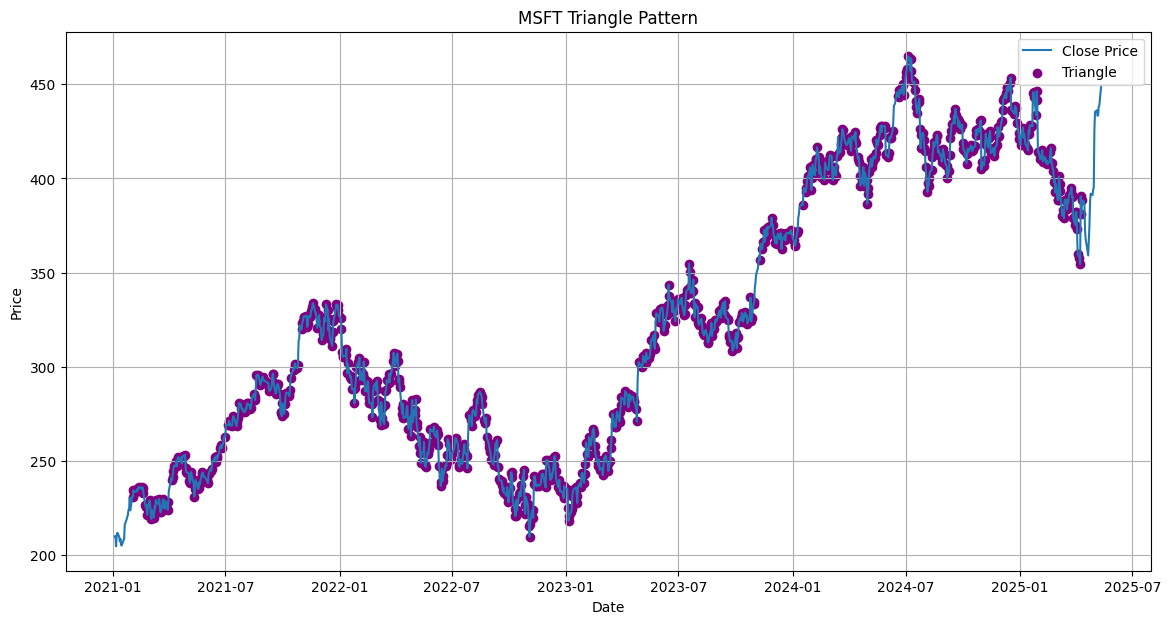

In [30]:
#Triangles
def triangle_pattern(data, window=20):
    data['Triangle'] = np.nan
    for i in range(window, len(data) - window):
        upper_bound = data['Close'][i - window:i].max()
        lower_bound = data['Close'][i:i + window].min()
        if upper_bound > lower_bound:
            data['Triangle'].iloc[i] = 1
    return data
# Apply the triangle pattern detection
data = triangle_pattern(data)
# Plot the triangle pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Triangle'] == 1], data['Close'][data['Triangle'] == 1], color='purple', label='Triangle')
plt.title(f'{ticker} Triangle Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Flags (ธง):

- ลักษณะ: Flags เป็นรูปแบบกราฟที่บ่งบอกถึงช่วงพักตัว (Consolidation) ในระยะสั้น หลังจากที่ราคาได้เคลื่อนที่ไปในทิศทางใดทิศทางหนึ่งอย่างรวดเร็ว โดยมีลักษณะคล้ายกับธงที่กำลังโบกสะบัด
- ส่วนประกอบ:
    - Flagpole (เสาธง): การเคลื่อนที่ของราคาอย่างรวดเร็วในทิศทางเดียว
    - Flag (ผืนธง): ช่วงพักตัวของราคาที่มีลักษณะเป็นสี่เหลี่ยมผืนผ้าหรือสี่เหลี่ยมคางหมู ซึ่งมีการเคลื่อนที่ของราคาในกรอบแคบ ๆ
- ประเภทของ Flags:
    1. Bull Flag (ธงกระทิง):
        - ลักษณะ: เกิดขึ้นหลังจากที่ราคาปรับตัวขึ้นอย่างรวดเร็ว (Flagpole) แล้วพักตัวในกรอบสี่เหลี่ยมผืนผ้าหรือสี่เหลี่ยมคางหมูที่เอียงลงเล็กน้อย (Flag)
        - การตีความ: บ่งบอกถึงแนวโน้มขาขึ้นที่แข็งแกร่ง มีโอกาสที่ราคาจะ Breakout ขึ้นไปด้านบน
    2. Bear Flag (ธงหมี):
        - ลักษณะ: เกิดขึ้นหลังจากที่ราคาปรับตัวลงอย่างรวดเร็ว (Flagpole) แล้วพักตัวในกรอบสี่เหลี่ยมผืนผ้าหรือสี่เหลี่ยมคางหมูที่เอียงขึ้นเล็กน้อย (Flag)
        - การตีความ: บ่งบอกถึงแนวโน้มขาลงที่แข็งแกร่ง มีโอกาสที่ราคาจะ Breakout ลงไปด้านล่าง
- การใช้งาน Flags:

    - รอการ Breakout: นักลงทุนส่วนใหญ่มักจะรอให้ราคา Breakout ออกจาก Flag ก่อนที่จะตัดสินใจซื้อขาย
    - Bull Flag: ถ้าราคา Breakout ขึ้นไปด้านบน มักจะเป็นสัญญาณซื้อ
    - Bear Flag: ถ้าราคา Breakout ลงไปด้านล่าง มักจะเป็นสัญญาณขาย
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความยาวของ Flagpole จากนั้นลากเส้นขึ้นหรือลงมาจากจุดที่ราคา Breakout
- สิ่งที่ Flags บอกเรา:

    - Bull Flag: แรงซื้อยังคงแข็งแกร่ง แม้ว่าจะมีช่วงพักตัว
    - Bear Flag: แรงขายยังคงแข็งแกร่ง แม้ว่าจะมีช่วงพักตัว

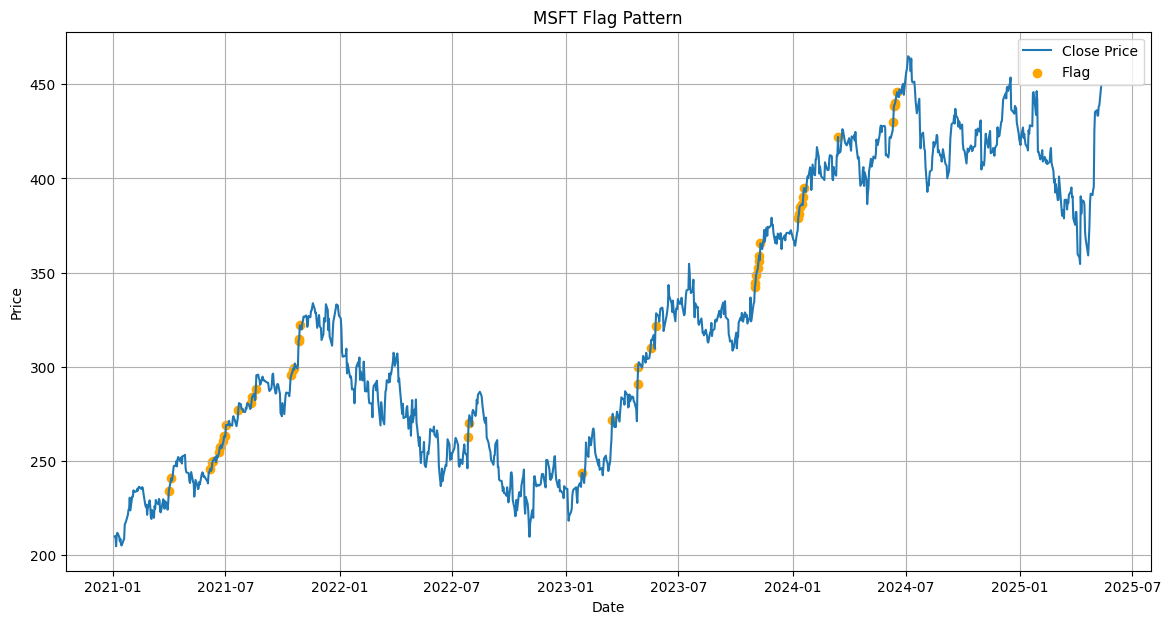

In [31]:
#Flags
def flag_pattern(data, window=20):
    data['Flag'] = np.nan
    for i in range(window, len(data) - window):
        upper_bound = data['Close'][i - window:i].max()
        lower_bound = data['Close'][i:i + window].min()
        if upper_bound < lower_bound:
            data['Flag'].iloc[i] = 1
    return data
# Apply the flag pattern detection
data = flag_pattern(data)
# Plot the flag pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Flag'] == 1], data['Close'][data['Flag'] == 1], color='orange', label='Flag')
plt.title(f'{ticker} Flag Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Pennants (ธงสามเหลี่ยม):

- ลักษณะ: Pennants เป็นรูปแบบกราฟที่บ่งบอกถึงช่วงพักตัว (Consolidation) ในระยะสั้น หลังจากที่ราคาได้เคลื่อนที่ไปในทิศทางใดทิศทางหนึ่งอย่างรวดเร็ว โดยมีลักษณะคล้ายกับธงสามเหลี่ยมที่ปลายแหลม
- ส่วนประกอบ:
    - Flagpole (เสาธง): การเคลื่อนที่ของราคาอย่างรวดเร็วในทิศทางเดียว
    - Pennant (ผืนธงสามเหลี่ยม): ช่วงพักตัวของราคาที่มีลักษณะเป็นสามเหลี่ยมสมมาตร ซึ่งมีการเคลื่อนที่ของราคาในกรอบที่แคบลงเรื่อย ๆ
- ประเภทของ Pennants:
    1. Bull Pennant (ธงสามเหลี่ยมกระทิง):
        - ลักษณะ: เกิดขึ้นหลังจากที่ราคาปรับตัวขึ้นอย่างรวดเร็ว (Flagpole) แล้วพักตัวในกรอบสามเหลี่ยมสมมาตร (Pennant)
        - การตีความ: บ่งบอกถึงแนวโน้มขาขึ้นที่แข็งแกร่ง มีโอกาสที่ราคาจะ Breakout ขึ้นไปด้านบน
    2. Bear Pennant (ธงสามเหลี่ยมหมี):
        - ลักษณะ: เกิดขึ้นหลังจากที่ราคาปรับตัวลงอย่างรวดเร็ว (Flagpole) แล้วพักตัวในกรอบสามเหลี่ยมสมมาตร (Pennant)
        - การตีความ: บ่งบอกถึงแนวโน้มขาลงที่แข็งแกร่ง มีโอกาสที่ราคาจะ Breakout ลงไปด้านล่าง
- ความแตกต่างระหว่าง Pennants และ Flags:

    - Pennants: มีลักษณะเป็นสามเหลี่ยมสมมาตร
    - Flags: มีลักษณะเป็นสี่เหลี่ยมผืนผ้าหรือสี่เหลี่ยมคางหมู
- การใช้งาน Pennants:

    - รอการ Breakout: นักลงทุนส่วนใหญ่มักจะรอให้ราคา Breakout ออกจาก Pennant ก่อนที่จะตัดสินใจซื้อขาย
    - Bull Pennant: ถ้าราคา Breakout ขึ้นไปด้านบน มักจะเป็นสัญญาณซื้อ
    - Bear Pennant: ถ้าราคา Breakout ลงไปด้านล่าง มักจะเป็นสัญญาณขาย
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความยาวของ Flagpole จากนั้นลากเส้นขึ้นหรือลงมาจากจุดที่ราคา Breakout
- สิ่งที่ Pennants บอกเรา:

    - Bull Pennant: แรงซื้อยังคงแข็งแกร่ง แม้ว่าจะมีช่วงพักตัว
    - Bear Pennant: แรงขายยังคงแข็งแกร่ง แม้ว่าจะมีช่วงพักตัว

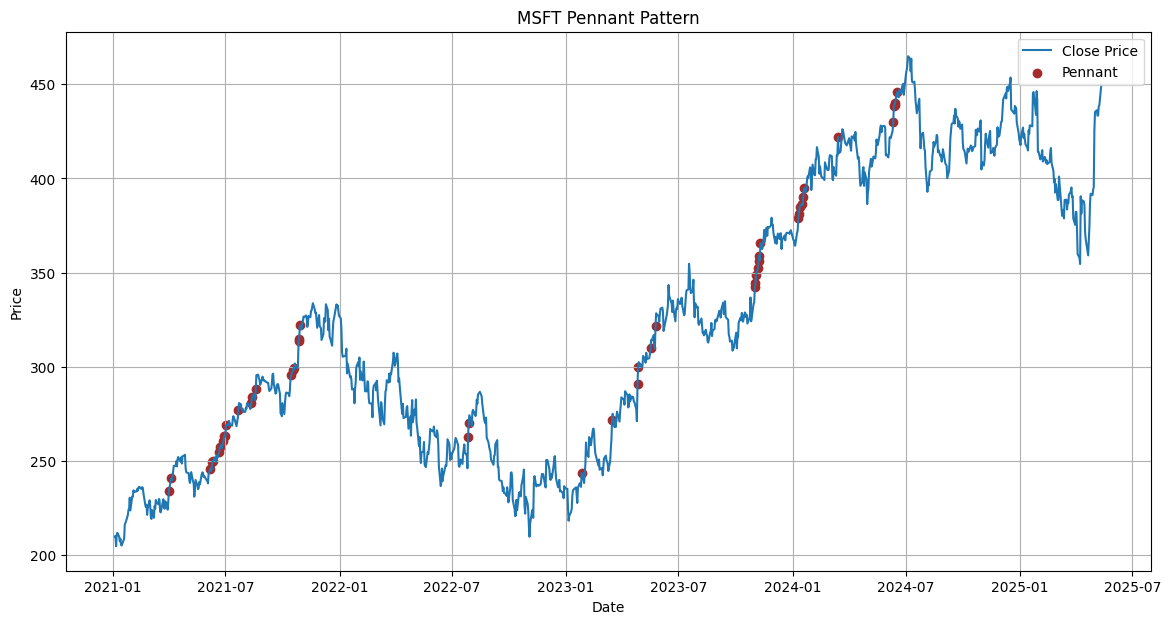

In [32]:
#Pennants
def pennant_pattern(data, window=20):
    data['Pennant'] = np.nan
    for i in range(window, len(data) - window):
        upper_bound = data['Close'][i - window:i].max()
        lower_bound = data['Close'][i:i + window].min()
        if upper_bound < lower_bound:
            data['Pennant'].iloc[i] = 1
    return data
# Apply the pennant pattern detection
data = pennant_pattern(data)
# Plot the pennant pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Pennant'] == 1], data['Close'][data['Pennant'] == 1], color='brown', label='Pennant')
plt.title(f'{ticker} Pennant Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Cup and Handle (ถ้วยและหู):

- ลักษณะ: Cup and Handle เป็นรูปแบบกราฟที่บ่งบอกถึงแนวโน้มขาขึ้น โดยมีลักษณะคล้ายกับถ้วยกาแฟที่มีหูจับ
- ส่วนประกอบ:
    1. Cup (ถ้วย): ส่วนโค้งที่คล้ายกับถ้วยกาแฟ ซึ่งราคาจะค่อย ๆ ปรับตัวลงแล้วค่อย ๆ ฟื้นตัวขึ้น
    2. Handle (หู): ช่วงพักตัวในระยะสั้น ๆ ที่มีลักษณะเป็นกรอบราคาแคบ ๆ ซึ่งมักจะเอียงลงเล็กน้อย
- รูปแบบ:
    1. แนวโน้มขาขึ้น: ก่อนเกิด Cup and Handle จะต้องมีแนวโน้มขาขึ้นมาก่อน
    2. Cup: ราคาค่อย ๆ ปรับตัวลงเป็นส่วนโค้งคล้ายถ้วย แล้วค่อย ๆ ฟื้นตัวขึ้นมาที่ระดับเดิม
    3. Handle: ราคาพักตัวในกรอบแคบ ๆ ที่มีลักษณะเป็นสี่เหลี่ยมผืนผ้าหรือสามเหลี่ยม ซึ่งมักจะเอียงลงเล็กน้อย
    4. Breakout: ราคา Breakout (ทะลุ) แนวต้านที่ขอบบนของ Handle
- การตีความ:
    - สัญญาณซื้อ: เมื่อราคา Breakout (ทะลุ) แนวต้านที่ขอบบนของ Handle ถือเป็นสัญญาณซื้อ ซึ่งบ่งบอกว่าแนวโน้มขาขึ้นกำลังจะกลับมา
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Cup (ระยะห่างระหว่างขอบบนและขอบล่างของ Cup) จากนั้นลากเส้นขึ้นมาจากจุดที่ราคา Breakout
- สิ่งที่ Cup and Handle บอกเรา:

    - การพักตัว: Cup and Handle แสดงถึงช่วงพักตัวของราคา หลังจากที่มีการปรับตัวขึ้นมาอย่างต่อเนื่อง
    - แรงซื้อที่แข็งแกร่ง: การที่ราคา Breakout ขึ้นไปได้ แสดงว่าแรงซื้อยังคงแข็งแกร่ง และมีโอกาสที่ราคาจะปรับตัวขึ้นต่อไป

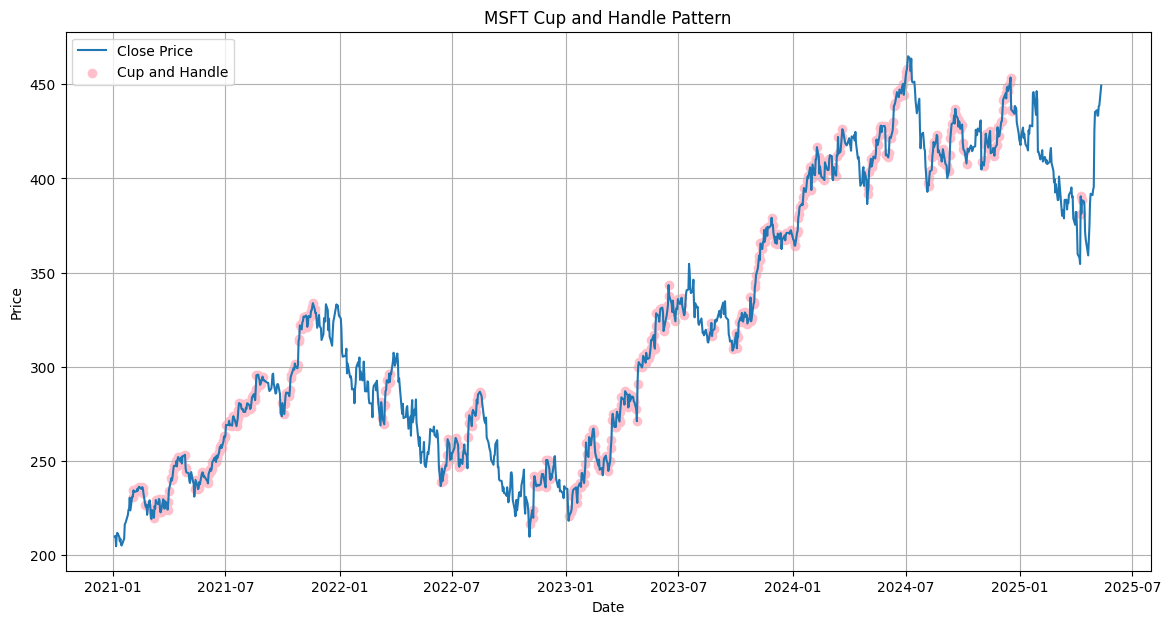

In [33]:
#Cup and Handle
def cup_and_handle(data, window=20):
    data['Cup and Handle'] = np.nan
    for i in range(window, len(data) - window):
        left_cup = data['Close'][i - window:i].min()
        right_cup = data['Close'][i:i + window].min()
        if left_cup < right_cup:
            data['Cup and Handle'].iloc[i] = 1
    return data
# Apply the cup and handle pattern detection
data = cup_and_handle(data)
# Plot the cup and handle pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Cup and Handle'] == 1], data['Close'][data['Cup and Handle'] == 1], color='pink', label='Cup and Handle')
plt.title(f'{ticker} Cup and Handle Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Wedge (ลิ่ม):

- ลักษณะ: Wedge เป็นรูปแบบกราฟที่คล้ายกับ Triangle (สามเหลี่ยม) แต่มีลักษณะเอียงขึ้นหรือเอียงลงอย่างชัดเจนกว่า โดยมีเส้นแนวโน้ม (Trendlines) สองเส้นที่มาบรรจบกัน
- ประเภทของ Wedge:
    1. Rising Wedge (ลิ่มขึ้น):
        - ลักษณะ: มีเส้นแนวรับ (Support Line) และเส้นแนวต้าน (Resistance Line) ที่เอียงขึ้น แต่เส้นแนวรับจะชันกว่าเส้นแนวต้าน ทำให้ราคาค่อย ๆ บีบตัวขึ้นไป
        - การตีความ: Rising Wedge มักจะเกิดขึ้นในแนวโน้มขาขึ้น แต่เป็นสัญญาณของการกลับตัวเป็นขาลง บ่งบอกว่าแรงซื้อเริ่มอ่อนแอลง และมีโอกาสที่ราคาจะ Breakout (ทะลุ) ลงไปด้านล่าง
    2. Falling Wedge (ลิ่มลง):
        - ลักษณะ: มีเส้นแนวรับและเส้นแนวต้านที่เอียงลง แต่เส้นแนวต้านจะชันกว่าเส้นแนวรับ ทำให้ราคาค่อย ๆ บีบตัวลงมา
        - การตีความ: Falling Wedge มักจะเกิดขึ้นในแนวโน้มขาลง แต่เป็นสัญญาณของการกลับตัวเป็นขาขึ้น บ่งบอกว่าแรงขายเริ่มอ่อนแอลง และมีโอกาสที่ราคาจะ Breakout ขึ้นไปด้านบน
- สิ่งที่ Wedge บอกเรา:
    - Rising Wedge: แรงซื้อเริ่มอ่อนแอ และมีโอกาสที่จะเกิดการกลับตัวเป็นขาลง
    - Falling Wedge: แรงขายเริ่มอ่อนแอ และมีโอกาสที่จะเกิดการกลับตัวเป็นขาขึ้น
- การใช้งาน:
    - รอการ Breakout: นักลงทุนส่วนใหญ่มักจะรอให้ราคา Breakout ออกจาก Wedge ก่อนที่จะตัดสินใจซื้อขาย
        - Rising Wedge: ถ้าราคา Breakout ลงไปด้านล่าง มักจะเป็นสัญญาณขาย
        - Falling Wedge: ถ้าราคา Breakout ขึ้นไปด้านบน มักจะเป็นสัญญาณซื้อ
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Wedge (ระยะห่างระหว่างเส้นแนวโน้มสองเส้นที่จุดเริ่มต้น) จากนั้นลากเส้นขึ้นหรือลงมาจากจุดที่ราคา Breakout

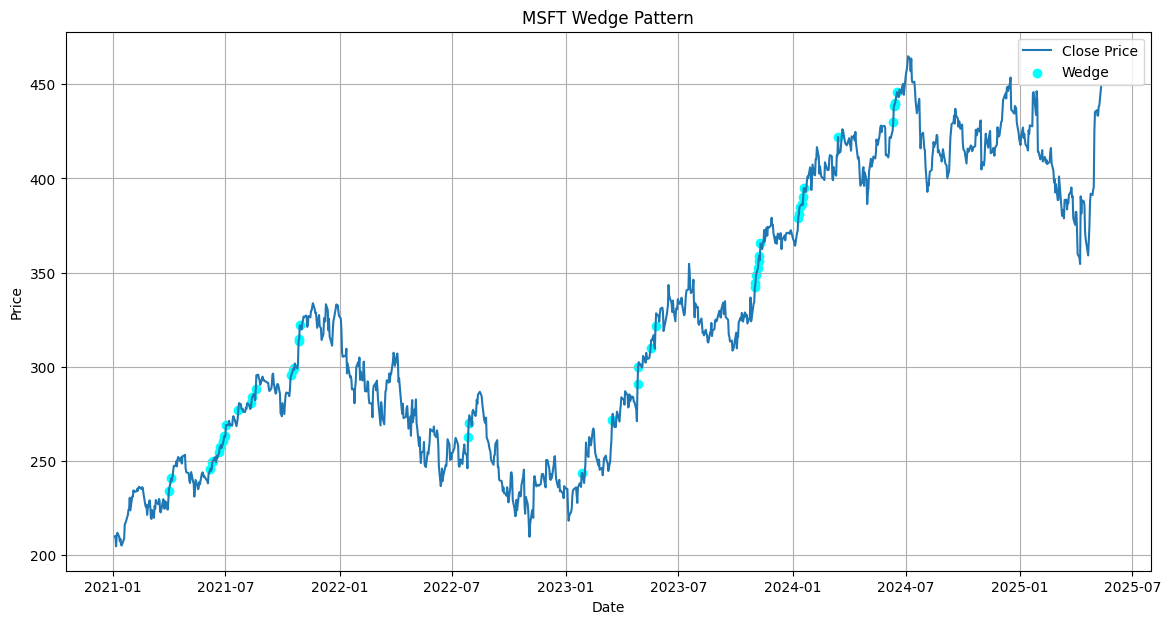

In [34]:
#Wedges
def wedge_pattern(data, window=20):
    data['Wedge'] = np.nan
    for i in range(window, len(data) - window):
        upper_bound = data['Close'][i - window:i].max()
        lower_bound = data['Close'][i:i + window].min()
        if upper_bound < lower_bound:
            data['Wedge'].iloc[i] = 1
    return data
# Apply the wedge pattern detection
data = wedge_pattern(data)
# Plot the wedge pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Wedge'] == 1], data['Close'][data['Wedge'] == 1], color='cyan', label='Wedge')
plt.title(f'{ticker} Wedge Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



## Gartley Patterns:

- ลักษณะ: Gartley Patterns เป็นรูปแบบกราฟ Harmonic ที่ใช้ในการวิเคราะห์ทางเทคนิค เพื่อระบุจุดกลับตัวที่เป็นไปได้ในตลาด โดยอาศัยความสัมพันธ์ของ Fibonacci Retracement และ Fibonacci Extension
- ส่วนประกอบหลัก: Gartley Patterns ประกอบด้วยจุด 5 จุด ได้แก่ X, A, B, C, และ D
- ประเภทของ Gartley Patterns:
    1. Gartley 222: เป็นรูปแบบพื้นฐานของ Gartley Patterns
    2. Bat Pattern: มีสัดส่วน Fibonacci ที่แตกต่างจาก Gartley 222
    3. Butterfly Pattern: มีสัดส่วน Fibonacci ที่แตกต่างจาก Gartley 222 และ Bat Pattern
    4. Crab Pattern: มีสัดส่วน Fibonacci ที่แตกต่างจาก Gartley 222, Bat Pattern, และ Butterfly Pattern
- สัดส่วน Fibonacci: Gartley Patterns จะมีสัดส่วน Fibonacci ที่เฉพาะเจาะจง ซึ่งใช้ในการยืนยันว่ารูปแบบนั้นถูกต้อง
- การใช้งาน:
    - ระบุจุด D: จุด D เป็นจุดที่คาดว่าจะเกิดการกลับตัวของราคา
    - ซื้อขาย: นักลงทุนจะรอให้ราคามาถึงจุด D แล้วพิจารณาซื้อ (ในกรณีของ Bullish Gartley) หรือขาย (ในกรณีของ Bearish Gartley)
    - Stop Loss: ตั้งจุด Stop Loss เพื่อจำกัดความเสี่ยง
    - เป้าหมายราคา: กำหนดเป้าหมายราคาโดยใช้ Fibonacci Extension หรือเครื่องมืออื่น ๆ
- รูปแบบ Gartley 222 (Bullish):

    1. XA: ราคาเคลื่อนที่ขึ้นไป (ขาขึ้น)
    2. AB: ราคาปรับตัวลง โดยที่จุด B อยู่ที่ระดับ 61.8% ของ XA
    3. BC: ราคาปรับตัวขึ้น โดยที่จุด C อยู่ที่ระดับ 38.2% หรือ 88.6% ของ AB
    4. CD: ราคาปรับตัวลง โดยที่ CD = 127.2% ของ AB และจุด D อยู่ที่ระดับ 78.6% ของ XA
- รูปแบบ Gartley 222 (Bearish):

    1. XA: ราคาเคลื่อนที่ลงไป (ขาลง)
    2. AB: ราคาปรับตัวขึ้น โดยที่จุด B อยู่ที่ระดับ 61.8% ของ XA
    3. BC: ราคาปรับตัวลง โดยที่จุด C อยู่ที่ระดับ 38.2% หรือ 88.6% ของ AB
    4. CD: ราคาปรับตัวขึ้น โดยที่ CD = 127.2% ของ AB และจุด D อยู่ที่ระดับ 78.6% ของ XA
- สิ่งที่ Gartley Patterns บอกเรา:

    - จุดกลับตัว: Gartley Patterns ช่วยในการระบุจุดกลับตัวที่เป็นไปได้ในตลาด
    - สัดส่วน Fibonacci: สัดส่วน Fibonacci ที่เฉพาะเจาะจงช่วยในการยืนยันว่ารูปแบบนั้นถูกต้อง

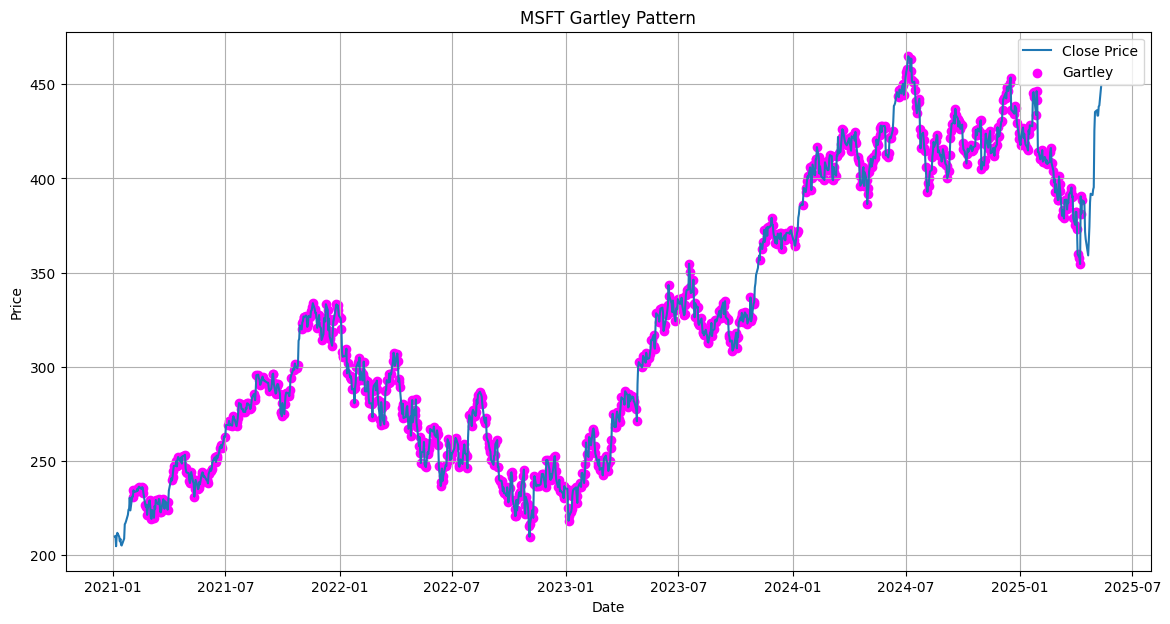

In [35]:
#Gartley Patterns
def gartley_pattern(data, window=20):
    data['Gartley'] = np.nan
    for i in range(window, len(data) - window):
        x = data['Close'][i - window:i].min()
        a = data['Close'][i - window:i].max()
        b = data['Close'][i:i + window].min()
        c = data['Close'][i:i + window].max()
        d = data['Close'][i:i + window].min()
        if x < a > b < c > d:
            data['Gartley'].iloc[i] = 1
    return data
# Apply the gartley pattern detection
data = gartley_pattern(data)
# Plot the gartley pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Gartley'] == 1], data['Close'][data['Gartley'] == 1], color='magenta', label='Gartley')
plt.title(f'{ticker} Gartley Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Broadening Formation (รูปแบบขยาย):

- ลักษณะ: Broadening Formation เป็นรูปแบบกราฟที่แสดงถึงความผันผวนที่เพิ่มขึ้นในตลาด โดยราคามีการแกว่งตัวที่กว้างขึ้นเรื่อย ๆ ทำให้มีลักษณะคล้ายกับปากที่กำลังเปิดกว้างออก
- ส่วนประกอบ:
    - Upper Trendline (เส้นแนวโน้มด้านบน): เชื่อมจุดสูงสุดที่สูงขึ้นเรื่อย ๆ
    - Lower Trendline (เส้นแนวโน้มด้านล่าง): เชื่อมจุดต่ำสุดที่ต่ำลงเรื่อย ๆ
    - เส้นแนวโน้มทั้งสองเส้นจะกางออกจากกัน
- ประเภทของ Broadening Formation:
    - Ascending Broadening Wedge: ราคาทำจุดสูงสุดและจุดต่ำสุดที่สูงขึ้นเรื่อย ๆ แต่ความชันของเส้นแนวโน้มด้านบนจะมากกว่าด้านล่าง
    - Descending Broadening Wedge: ราคาทำจุดสูงสุดและจุดต่ำสุดที่ต่ำลงเรื่อย ๆ แต่ความชันของเส้นแนวโน้มด้านล่างจะมากกว่าด้านบน
    - Broadening Top: เกิดขึ้นหลังจากแนวโน้มขาขึ้น ราคาทำจุดสูงสุดที่สูงขึ้น แต่ไม่สามารถรักษาระดับไว้ได้ และเริ่มทำจุดต่ำสุดที่ต่ำลงเรื่อย ๆ
    - Broadening Bottom: เกิดขึ้นหลังจากแนวโน้มขาลง ราคาทำจุดต่ำสุดที่ต่ำลง แต่ไม่สามารถรักษาระดับไว้ได้ และเริ่มทำจุดสูงสุดที่สูงขึ้นเรื่อย ๆ
- การตีความ:
    - Broadening Formation บ่งบอกถึงความไม่แน่นอนและความสับสนในตลาด
    - มักเกิดขึ้นในช่วงปลายของแนวโน้ม หรือในช่วงที่มีข่าวสารหรือเหตุการณ์สำคัญที่ส่งผลกระทบต่อตลาด
    - การ Breakout (ทะลุ) ออกจาก Broadening Formation อาจเกิดขึ้นได้ทั้งด้านบนและด้านล่าง
- การใช้งาน:
    - รอการ Breakout: นักลงทุนส่วนใหญ่มักจะรอให้ราคา Breakout ออกจาก Broadening Formation ก่อนที่จะตัดสินใจซื้อขาย
    - กำหนด Stop Loss: ตั้งจุด Stop Loss เพื่อจำกัดความเสี่ยง
- สิ่งที่ Broadening Formation บอกเรา:
    - ความผันผวนที่เพิ่มขึ้น
    - ความไม่แน่นอนในตลาด
    - อาจเป็นสัญญาณของการกลับตัว

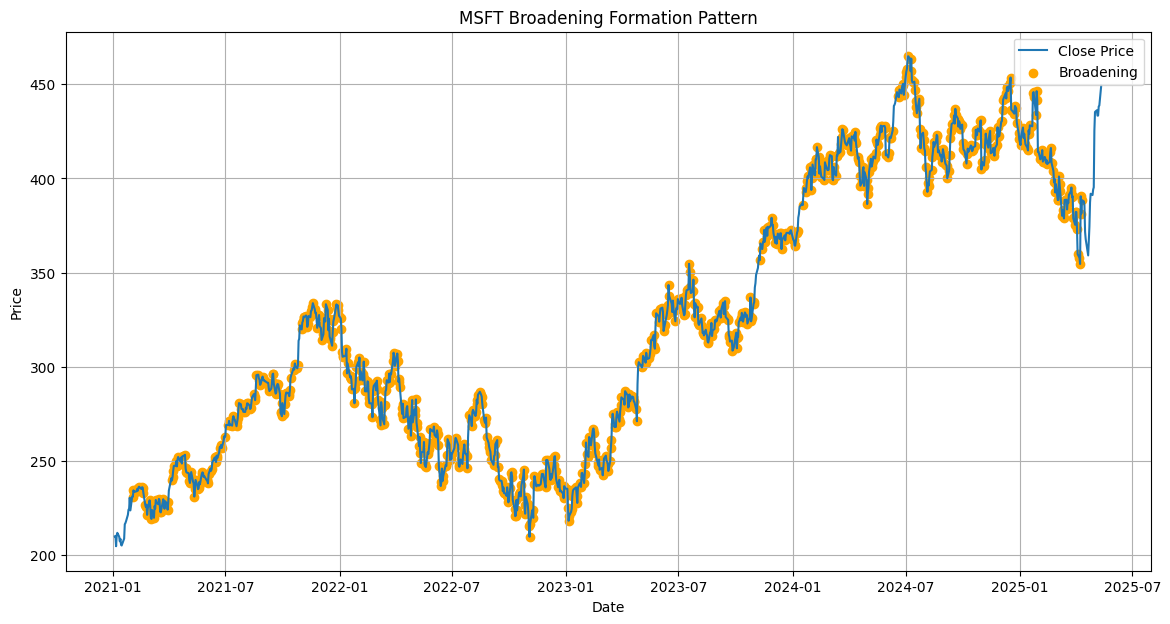

In [39]:
#Broadening Formation
def broadening_formation(data, window=20):
    data['Broadening'] = np.nan
    for i in range(window, len(data) - window):
        upper_bound = data['Close'][i - window:i].max()
        lower_bound = data['Close'][i:i + window].min()
        if upper_bound > lower_bound:
            data['Broadening'].iloc[i] = 1
    return data
# Apply the broadening formation pattern detection
data = broadening_formation(data)
# Plot the broadening formation pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Broadening'] == 1], data['Close'][data['Broadening'] == 1], color='orange', label='Broadening')
plt.title(f'{ticker} Broadening Formation Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Rectangle Pattern (รูปแบบสี่เหลี่ยมผืนผ้า):

- ลักษณะ: Rectangle Pattern เป็นรูปแบบกราฟที่แสดงถึงช่วงพักตัว (Consolidation) ของราคา โดยราคาจะเคลื่อนที่อยู่ในกรอบสี่เหลี่ยมผืนผ้าที่ชัดเจน ซึ่งมีเส้นแนวรับ (Support Line) และเส้นแนวต้าน (Resistance Line) ที่ขนานกัน
- ส่วนประกอบ:
    - Support Line (เส้นแนวรับ): เส้นที่ลากเชื่อมจุดต่ำสุดของราคาในช่วงพักตัว
    - Resistance Line (เส้นแนวต้าน): เส้นที่ลากเชื่อมจุดสูงสุดของราคาในช่วงพักตัว
    - เส้นแนวรับและแนวต้านจะเป็นเส้นขนานกัน
- รูปแบบ:
    1. แนวโน้มก่อนหน้า: ก่อนเกิด Rectangle Pattern อาจมีแนวโน้มขาขึ้นหรือขาลงมาก่อน
    2. ช่วงพักตัว: ราคาจะเคลื่อนที่อยู่ในกรอบสี่เหลี่ยมผืนผ้า โดยมีการแกว่งตัวระหว่างเส้นแนวรับและแนวต้าน
    3. Breakout: ราคาจะ Breakout (ทะลุ) ออกจากกรอบสี่เหลี่ยมผืนผ้าไปในทิศทางใดทิศทางหนึ่ง
- การตีความ:
    - สัญญาณซื้อขาย:
        - Bullish Rectangle: หากเกิดหลังจากแนวโน้มขาขึ้น และราคา Breakout ขึ้นไปด้านบน มักจะเป็นสัญญาณซื้อ
        - Bearish Rectangle: หากเกิดหลังจากแนวโน้มขาลง และราคา Breakout ลงไปด้านล่าง มักจะเป็นสัญญาณขาย
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Rectangle (ระยะห่างระหว่างเส้นแนวรับและแนวต้าน) จากนั้นลากเส้นขึ้นหรือลงมาจากจุดที่ราคา Breakout
- สิ่งที่ Rectangle Pattern บอกเรา:
    - ช่วงพักตัว: Rectangle Pattern แสดงถึงช่วงพักตัวของราคา ก่อนที่จะมีการเคลื่อนที่ครั้งใหญ่ในทิศทางใดทิศทางหนึ่ง
    - ความสมดุล: ในช่วงพักตัว แรงซื้อและแรงขายอยู่ในสภาวะสมดุล

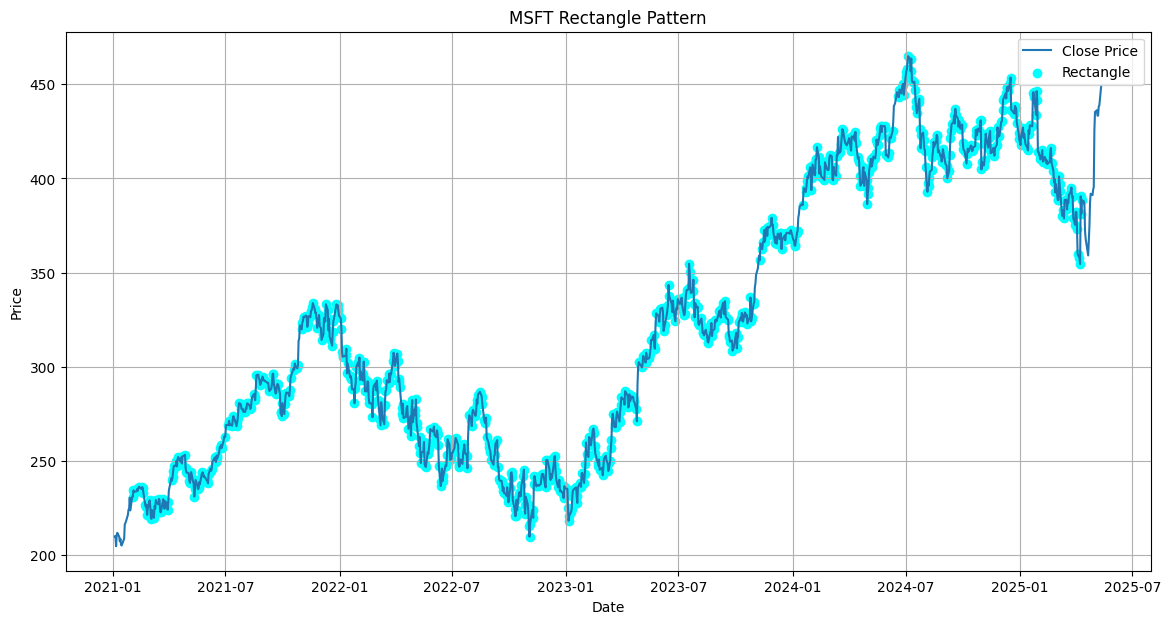

In [40]:
#Rectangle
def rectangle_pattern(data, window=20):
    data['Rectangle'] = np.nan
    for i in range(window, len(data) - window):
        upper_bound = data['Close'][i - window:i].max()
        lower_bound = data['Close'][i:i + window].min()
        if upper_bound > lower_bound:
            data['Rectangle'].iloc[i] = 1
    return data
# Apply the rectangle pattern detection
data = rectangle_pattern(data)
# Plot the rectangle pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Rectangle'] == 1], data['Close'][data['Rectangle'] == 1], color='cyan', label='Rectangle')
plt.title(f'{ticker} Rectangle Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Bump and Run Reversal Top (BRRT):

- ลักษณะ: Bump and Run Reversal Top (BRRT) เป็นรูปแบบการกลับตัวที่เป็นขาลง ซึ่งเริ่มต้นด้วยการนำ (Bump) ไปสู่การปรับตัวขึ้น จากนั้นตามด้วยการวิ่ง (Run) ไปสู่จุดสูงสุด และจบลงด้วยการปรับตัวลง
- ส่วนประกอบ:
    1. Lead-in (ช่วงนำ): ราคามีการปรับตัวขึ้นอย่างต่อเนื่อง
    2. Bump (ส่วนนูน): ราคาปรับตัวขึ้นอย่างรวดเร็วจนเกิดเป็นส่วนนูนขึ้นมา
    3. Run (ส่วนวิ่ง): ราคาปรับตัวขึ้นต่อเนื่องจากส่วนนูน แต่ความชันจะลดลง
    4. Reversal (ส่วนกลับตัว): ราคาเริ่มปรับตัวลง และทะลุเส้นแนวโน้ม
- รูปแบบ:
    1. Lead-in (ช่วงนำ): ราคามีการปรับตัวขึ้นอย่างต่อเนื่อง
    2. Bump (ส่วนนูน): ราคาปรับตัวขึ้นอย่างรวดเร็วจนเกิดเป็นส่วนนูนขึ้นมา
    3. Run (ส่วนวิ่ง): ราคาปรับตัวขึ้นต่อเนื่องจากส่วนนูน แต่ความชันจะลดลง
    4. Failure of the Run (ความล้มเหลวของส่วนวิ่ง): ราคาไม่สามารถทำจุดสูงสุดใหม่ได้
    5. Breakdown (การทะลุลง): ราคาเริ่มปรับตัวลง และทะลุเส้นแนวโน้ม
- การตีความ:
    - BRRT เป็นรูปแบบการกลับตัวของราคาที่ส่งสัญญาณว่าราคาอาจเปลี่ยนทิศทางจากขาขึ้นเป็นขาลง
- การใช้งาน:
    - สัญญาณขาย: เมื่อราคาเริ่มปรับตัวลง และทะลุเส้นแนวโน้ม
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Bump จากนั้นลากเส้นลงมาจากจุดที่ราคา Breakdown
- สิ่งที่ BRRT บอกเรา:
    - แรงซื้อเริ่มอ่อนแอ
    - ราคาไม่สามารถทำจุดสูงสุดใหม่ได้
    - มีโอกาสที่ราคาจะเปลี่ยนทิศทางจากขาขึ้นเป็นขาลง

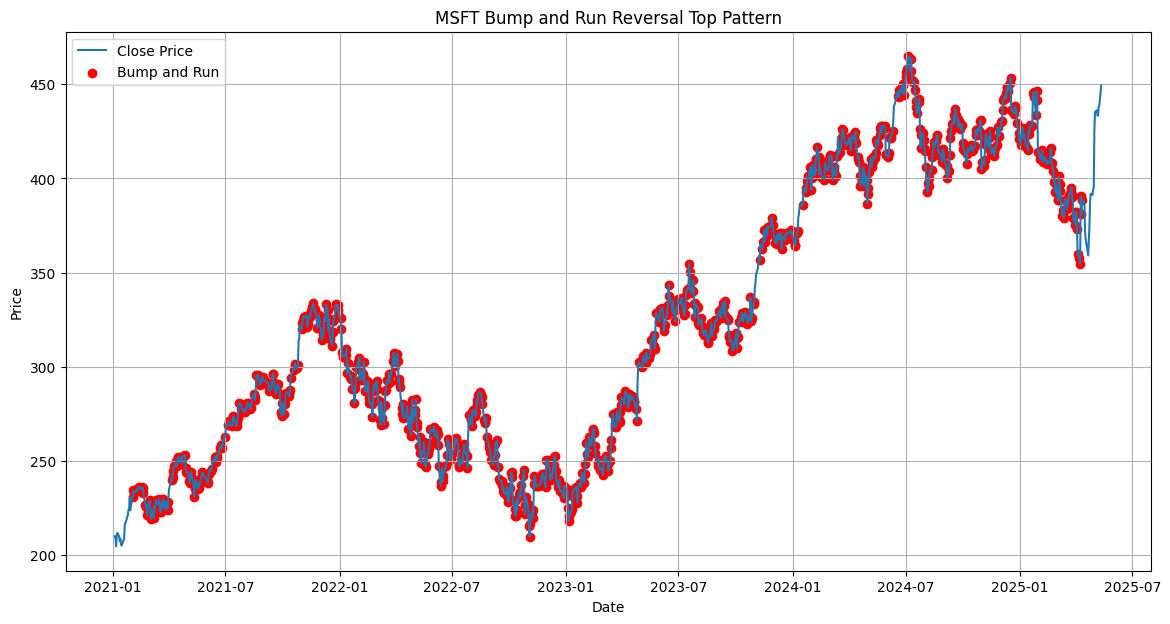

In [41]:
#Bump and Run Reversal Top (BRRT)
def bump_and_run_reversal_top(data, window=20):
    data['Bump and Run'] = np.nan
    for i in range(window, len(data) - window):
        left_bump = data['Close'][i - window:i].max()
        right_bump = data['Close'][i:i + window].min()
        if left_bump > right_bump:
            data['Bump and Run'].iloc[i] = 1
    return data
# Apply the bump and run reversal top pattern detection
data = bump_and_run_reversal_top(data)
# Plot the bump and run reversal top pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Bump and Run'] == 1], data['Close'][data['Bump and Run'] == 1], color='red', label='Bump and Run')
plt.title(f'{ticker} Bump and Run Reversal Top Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Rounding Bottom (ก้นกลม):

- ลักษณะ: Rounding Bottom เป็นรูปแบบที่แสดงถึงการเปลี่ยนแนวโน้มจากขาลงเป็นขาขึ้นอย่างค่อยเป็นค่อยไป โดยมีลักษณะเป็นส่วนโค้งที่คล้ายกับก้นกระทะหรือก้นชาม
- ส่วนประกอบ:
    1. แนวโน้มขาลง: ก่อนเกิด Rounding Bottom จะต้องมีแนวโน้มขาลงมาก่อน
    2. ส่วนโค้ง: ราคาจะค่อย ๆ ปรับตัวลงเป็นส่วนโค้งคล้ายก้นกระทะ
    3. แนวโน้มขาขึ้น: หลังจากที่ราคาลงไปถึงจุดต่ำสุดแล้ว จะค่อย ๆ ปรับตัวขึ้น
- รูปแบบ:
    1. แนวโน้มขาลง: ราคามีการปรับตัวลงอย่างต่อเนื่อง
    2. Deceleration (การชะลอตัว): ราคาเริ่มชะลอตัวในการปรับตัวลง
    3. Bottom Formation (การก่อตัวของก้น): ราคาเคลื่อนที่ในลักษณะที่เป็นส่วนโค้งคล้ายก้นกระทะ
    4. Acceleration (การเร่งตัว): ราคาเริ่มปรับตัวขึ้นอย่างรวดเร็ว
    5. Breakout (การทะลุ): ราคา Breakout (ทะลุ) แนวต้าน
- การตีความ:
    - Rounding Bottom เป็นรูปแบบที่แสดงถึงการสะสมแรงซื้อ และส่งสัญญาณว่าราคาอาจเปลี่ยนทิศทางจากขาลงเป็นขาขึ้น
- การใช้งาน:
    - สัญญาณซื้อ: เมื่อราคาเริ่มปรับตัวขึ้น และทะลุเส้นแนวต้าน
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Rounding Bottom จากนั้นลากเส้นขึ้นมาจากจุดที่ราคา Breakout
- สิ่งที่ Rounding Bottom บอกเรา:
    - แรงขายเริ่มอ่อนแอ
    - มีการสะสมแรงซื้อ
    - มีโอกาสที่ราคาจะเปลี่ยนทิศทางจากขาลงเป็นขาขึ้น

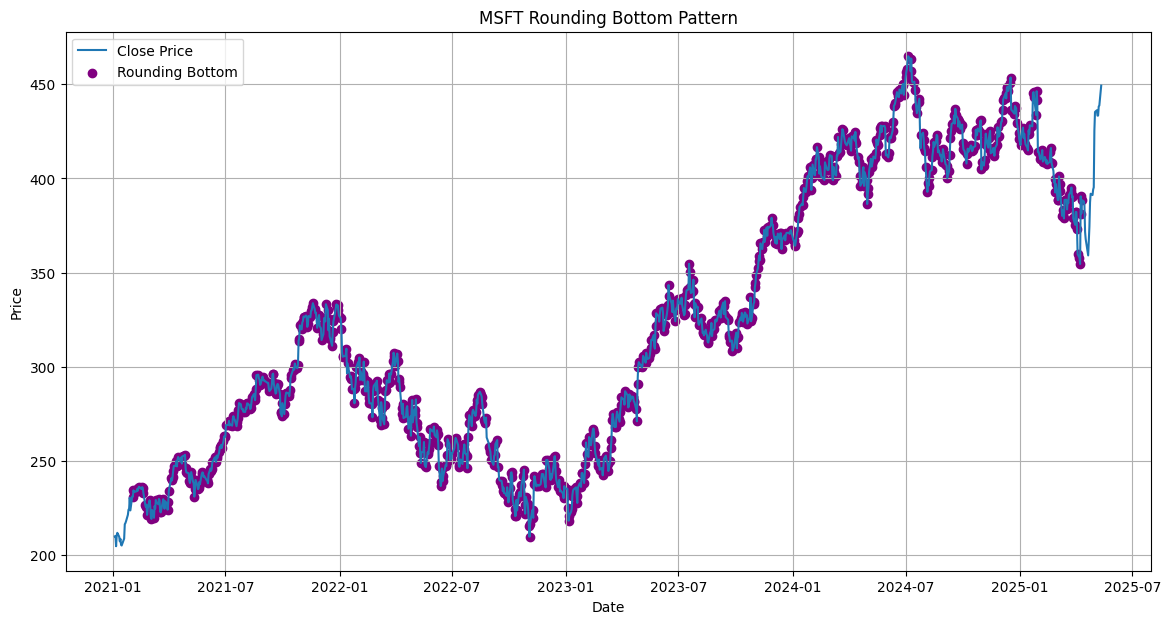

In [43]:
#Rounding Bottom
def rounding_bottom(data, window=20):
    data['Rounding Bottom'] = np.nan
    for i in range(window, len(data) - window):
        left_bottom = data['Close'][i - window:i].min()
        right_bottom = data['Close'][i:i + window].max()
        if left_bottom < right_bottom:
            data['Rounding Bottom'].iloc[i] = 1
    return data
# Apply the rounding bottom pattern detection
data = rounding_bottom(data)
# Plot the rounding bottom pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Rounding Bottom'] == 1], data['Close'][data['Rounding Bottom'] == 1], color='purple', label='Rounding Bottom')
plt.title(f'{ticker} Rounding Bottom Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


## Rounding Top (ยอดกลม):

- ลักษณะ: Rounding Top เป็นรูปแบบที่แสดงถึงการเปลี่ยนแนวโน้มจากขาขึ้นเป็นขาลงอย่างค่อยเป็นค่อยไป โดยมีลักษณะเป็นส่วนโค้งที่คล้ายกับยอดเขาหรือหลังคาโค้ง
- ส่วนประกอบ:
    1. แนวโน้มขาขึ้น: ก่อนเกิด Rounding Top จะต้องมีแนวโน้มขาขึ้นมาก่อน
    2. ส่วนโค้ง: ราคาจะค่อย ๆ ปรับตัวขึ้นเป็นส่วนโค้งคล้ายยอดเขา
    3. แนวโน้มขาลง: หลังจากที่ราคาขึ้นไปถึงจุดสูงสุดแล้ว จะค่อย ๆ ปรับตัวลง
- รูปแบบ:
    1. แนวโน้มขาขึ้น: ราคามีการปรับตัวขึ้นอย่างต่อเนื่อง
    2. Deceleration (การชะลอตัว): ราคาเริ่มชะลอตัวในการปรับตัวขึ้น
    3. Top Formation (การก่อตัวของยอด): ราคาเคลื่อนที่ในลักษณะที่เป็นส่วนโค้งคล้ายยอดเขา
    4. Acceleration (การเร่งตัว): ราคาเริ่มปรับตัวลงอย่างรวดเร็ว
    5. Breakdown (การทะลุ): ราคา Breakdown (ทะลุ) แนวรับ
- การตีความ:
    - Rounding Top เป็นรูปแบบที่แสดงถึงการกระจายแรงขาย และส่งสัญญาณว่าราคาอาจเปลี่ยนทิศทางจากขาขึ้นเป็นขาลง
- การใช้งาน:
    - สัญญาณขาย: เมื่อราคาเริ่มปรับตัวลง และทะลุเส้นแนวรับ
    - เป้าหมายราคา: สามารถประมาณเป้าหมายราคาได้โดยการวัดความสูงของ Rounding Top จากนั้นลากเส้นลงมาจากจุดที่ราคา Breakdown
- สิ่งที่ Rounding Top บอกเรา:
    - แรงซื้อเริ่มอ่อนแอ
    - มีการกระจายแรงขาย
    - มีโอกาสที่ราคาจะเปลี่ยนทิศทางจากขาขึ้นเป็นขาลง

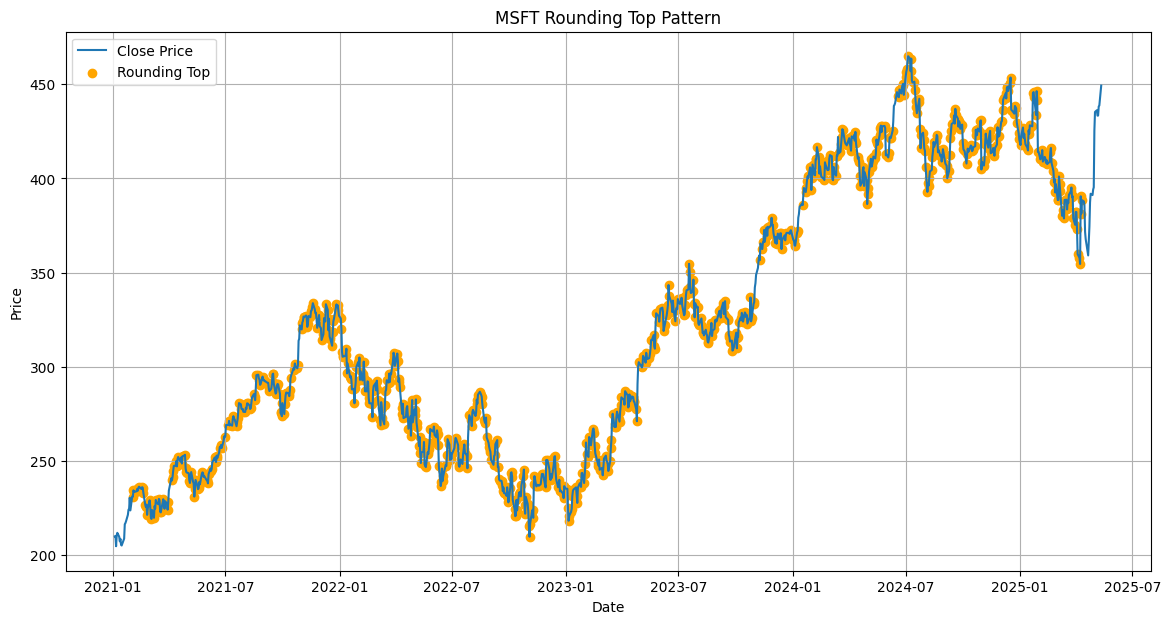

In [44]:
#Rounding Top
def rounding_top(data, window=20):
    data['Rounding Top'] = np.nan
    for i in range(window, len(data) - window):
        left_top = data['Close'][i - window:i].max()
        right_top = data['Close'][i:i + window].min()
        if left_top > right_top:
            data['Rounding Top'].iloc[i] = 1
    return data
# Apply the rounding top pattern detection
data = rounding_top(data)
# Plot the rounding top pattern
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.scatter(data.index[data['Rounding Top'] == 1], data['Close'][data['Rounding Top'] == 1], color='orange', label='Rounding Top')
plt.title(f'{ticker} Rounding Top Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

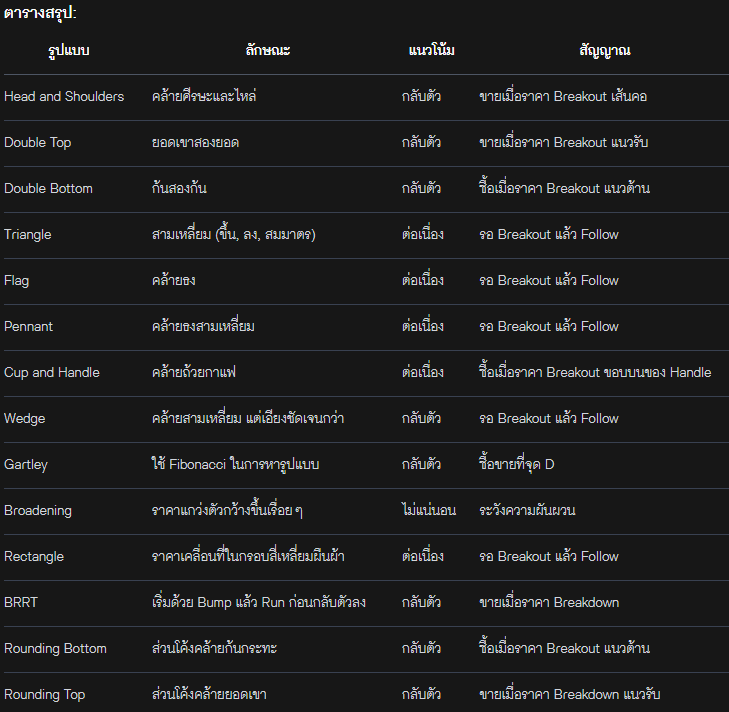

รูปแบบการกลับตัว (Reversal Patterns):

- Head and Shoulders: บ่งบอกการกลับตัวจากขาขึ้นเป็นขาลง มีลักษณะคล้ายศีรษะและไหล่
- Double Top: บ่งบอกการกลับตัวจากขาขึ้นเป็นขาลง มีลักษณะเป็นยอดเขาสองยอดที่ระดับราคาใกล้เคียงกัน
- Double Bottom: บ่งบอกการกลับตัวจากขาลงเป็นขาขึ้น มีลักษณะเป็นก้นสองก้นที่ระดับราคาใกล้เคียงกัน
- Bump and Run Reversal Top (BRRT): บ่งบอกการกลับตัวจากขาขึ้นเป็นขาลง เริ่มด้วย Bump แล้ว Run ไปสู่จุดสูงสุด ก่อนจะกลับตัวลง
- Rounding Top: บ่งบอกการกลับตัวจากขาขึ้นเป็นขาลงอย่างค่อยเป็นค่อยไป มีลักษณะเป็นส่วนโค้งคล้ายยอดเขา
- Rounding Bottom: บ่งบอกการกลับตัวจากขาลงเป็นขาขึ้นอย่างค่อยเป็นค่อยไป มีลักษณะเป็นส่วนโค้งคล้ายก้นกระทะ

รูปแบบต่อเนื่อง (Continuation Patterns):

- Triangle: บ่งบอกช่วงพักตัว ก่อนที่จะ Breakout ไปในทิศทางใดทิศทางหนึ่ง มี 3 แบบ: Ascending, Descending, Symmetrical
- Flag: บ่งบอกช่วงพักตัวในระยะสั้น หลังจากที่ราคาเคลื่อนที่ไปในทิศทางใดทิศทางหนึ่งอย่างรวดเร็ว มีลักษณะคล้ายธง
- Pennant: คล้ายกับ Flag แต่มีลักษณะเป็นสามเหลี่ยมสมมาตร
- Cup and Handle: บ่งบอกแนวโน้มขาขึ้น มีลักษณะคล้ายถ้วยกาแฟที่มีหูจับ
- Rectangle: บ่งบอกช่วงพักตัวของราคา โดยราคาจะเคลื่อนที่อยู่ในกรอบสี่เหลี่ยมผืนผ้า

รูปแบบอื่น ๆ:

- Wedge: คล้ายกับ Triangle แต่มีลักษณะเอียงขึ้นหรือเอียงลงอย่างชัดเจนกว่า บ่งบอกการกลับตัว
- Gartley: เป็นรูปแบบกราฟ Harmonic ที่ใช้ Fibonacci ในการหารูปแบบและจุดกลับตัว
- Broadening: ราคาแกว่งตัวกว้างขึ้นเรื่อย ๆ บ่งบอกความผันผวนที่เพิ่มขึ้น
- Ascending Broadening Wedge: ราคาทำจุดสูงสุดและจุดต่ำสุดที่สูงขึ้นเรื่อย ๆ แต่ความชันของเส้นแนวโน้มด้านบนจะมากกว่าด้านล่าง
- Descending Broadening Wedge: ราคาทำจุดสูงสุดและจุดต่ำสุดที่ต่ำลงเรื่อย ๆ แต่ความชันของเส้นแนวโน้มด้านล่างจะมากกว่าด้านบน